In [ ]:
import pandas as pd
from google.colab import files
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

The dataset source:
https://www.kaggle.com/datasets/joebeachcapital/top-1000-steam-games/data

# steam_app_data

In [ ]:
df = files.upload()

Saving steam_app_data.csv to steam_app_data.csv


In [ ]:
df_app = pd.read_csv('/content/steam_app_data.csv')

In [ ]:
df_app.head()

,type,name,steam_appid,required_age,is_free,controller_support,dlc,detailed_description,about_the_game,short_description,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,game,Counter-Strike,10,0.0,False,NaN,NaN,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,Play the world's number 1 online action game. ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 137378},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,game,Team Fortress Classic,20,0.0,False,NaN,NaN,One of the most popular online action games of...,One of the most popular online action games of...,One of the most popular online action games of...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 5474},NaN,"{'coming_soon': False, 'date': '1 Apr, 1999'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
2,game,Day of Defeat,30,0.0,False,NaN,NaN,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 3694},NaN,"{'coming_soon': False, 'date': '1 May, 2003'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
3,game,Deathmatch Classic,40,0.0,False,NaN,NaN,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 1924},NaN,"{'coming_soon': False, 'date': '1 Jun, 2001'}","{'url': '', 'email': ''}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
4,game,Half-Life: Opposing Force,50,0.0,False,NaN,NaN,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 15478},NaN,"{'coming_soon': False, 'date': '1 Nov, 1999'}","{'url': 'https://help.steampowered.com', 'emai...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"


In [ ]:
df_app.columns

Index(['type', 'name', 'steam_appid', 'required_age', 'is_free',
       'controller_support', 'dlc', 'detailed_description', 'about_the_game',
       'short_description', 'fullgame', 'supported_languages', 'header_image',
       'website', 'pc_requirements', 'mac_requirements', 'linux_requirements',
       'legal_notice', 'drm_notice', 'ext_user_account_notice', 'developers',
       'publishers', 'demos', 'price_overview', 'packages', 'package_groups',
       'platforms', 'metacritic', 'reviews', 'categories', 'genres',
       'screenshots', 'movies', 'recommendations', 'achievements',
       'release_date', 'support_info', 'background', 'content_descriptors'],
      dtype='object')

The columns we are interested in:


*   name
*  developers
*  publishers
*  genres
*  supported_languages
*  price_overview
*  metacritic
*  recommendations
*  release_date


In [ ]:
df_app = df_app[['name','developers','publishers','genres',
        'supported_languages','price_overview','metacritic',
        'recommendations','release_date']]

### Data Cleaning & Transformation

In [ ]:
# Get text values from lists in deelopers & publishers
df_app['developers'] = df_app['developers'].str.strip("[]").str.strip("''")
df_app['publishers'] = df_app['publishers'].str.strip("[]").str.strip("''")

In [ ]:
# Extract values from genres

# Function to convert list of dictionaries to comma-separated string
def convert_to_string(genres):
    if isinstance(genres, list):
        return ','.join([d['description'] for d in genres])
    elif isinstance(genres, str):
        genres_dict = ast.literal_eval(genres)
        return ','.join([d['description'] for d in genres_dict])
    else:
        return ''

# Replace NaN values with an empty list
df_app['genres'].fillna('[]', inplace=True)

# Apply the conversion function to the 'genres' column
df_app['genres'] = df_app['genres'].apply(convert_to_string)

In [ ]:
# Function to get numeric values from dictionary - columns metacritic & recommendations

def extract_and_join_numeric(df, column_name, key_name):
    # Replace NaN values with an empty list
    df[column_name].fillna('[]', inplace=True)

    # Function to convert list of dictionaries to comma-separated string
    def convert_to_string(genres):
        if isinstance(genres, list):
            return ','.join([str(d[key_name]) for d in genres])
        elif isinstance(genres, str):
            try:
                genres_dict = ast.literal_eval(genres)
                if isinstance(genres_dict, dict):  # Check if it's a dictionary
                    return str(genres_dict.get(key_name, ''))
                else:
                    return ''
            except (SyntaxError, ValueError):
                return ''
        else:
            return ''

    # Apply the conversion function to the specified column
    df[column_name] = df[column_name].apply(convert_to_string)

    # Return the DataFrame with modified column
    return df

In [ ]:
df_app = extract_and_join_numeric(df_app, 'metacritic', 'score')
df_app = extract_and_join_numeric(df_app, 'recommendations', 'total')



# Replace empty strings with NaN
df_app['metacritic'].replace('', np.nan, inplace=True)
df_app['recommendations'].replace('', np.nan, inplace=True)

# Convert text values to float
df_app['metacritic'] = df_app['metacritic'].astype(float)
df_app['recommendations'] = df_app['recommendations'].astype(float)

In [ ]:
# Function to extract values from dictionaries in a column and join them with commas
def extract_and_join_string(df, column_name, key_name):
    # Replace NaN values with an empty list
    df[column_name].fillna('[]', inplace=True)

    # Function to convert list of dictionaries to comma-separated string
    def convert_to_string(genres):
        if isinstance(genres, list):
            return ','.join([str(d[key_name]) for d in genres])
        elif isinstance(genres, str):
            try:
                genres_dict = ast.literal_eval(genres)
                if isinstance(genres_dict, dict):  # Check if it's a dictionary
                    return str(genres_dict.get(key_name, ''))
                else:
                    return ''
            except (SyntaxError, ValueError):
                return ''
        else:
            return ''

    # Apply the conversion function to the specified column
    df[column_name] = df[column_name].apply(convert_to_string)

    # Return the DataFrame with modified column
    return df

In [ ]:
# Extract text values from dict

df_app = extract_and_join_string(df_app, 'price_overview', 'final_formatted')
# Replace currency symbol and convert to numeric
df_app['price'] = pd.to_numeric(df_app['price_overview'].str.replace(r'[^0-9.]', '', regex=True), errors='coerce')


df_app = extract_and_join_string(df_app, 'release_date', 'date')
# Convert release_date to datetime format with specified format
df_app['release_date'] = pd.to_datetime(df_app['release_date'], format='%d %b, %Y', errors='coerce')
# Extract year from release_date and create new column 'year'
df_app['year'] = df_app['release_date'].dt.year

In [ ]:
# Function to check if 'supported_languages' contains Ukrainian language
def has_ukrainian(row):
    if isinstance(row['supported_languages'], str):  # Check if the value is a string
        # Check if 'Ukrainian' is present in supported languages
        if 'Ukrainian' in row['supported_languages']:
            return 'Yes'
        else:
            return 'No'
    else:
        return 'No'  # If it's not a string (e.g., NaN), return 'No'

In [ ]:
df_app['Ukr_lang'] = df_app.apply(has_ukrainian, axis=1)

In [ ]:
# drop supported_languages & price_overview & release_date
df_app.drop(columns=['supported_languages','price_overview', 'release_date'],
            inplace=True)

In [ ]:
df_app.head()

,name,developers,publishers,genres,metacritic,recommendations,price,year,Ukr_lang
0,Counter-Strike,Valve,Valve,Action,88.0,137378.0,14.5,2000.0,No
1,Team Fortress Classic,Valve,Valve,Action,NaN,5474.0,7.5,1999.0,No
2,Day of Defeat,Valve,Valve,Action,79.0,3694.0,7.5,2003.0,No
3,Deathmatch Classic,Valve,Valve,Action,NaN,1924.0,7.5,2001.0,No
4,Half-Life: Opposing Force,Gearbox Software,Valve,Action,NaN,15478.0,7.5,1999.0,No


In [ ]:
# download cleaned dataset
df_app.to_csv('top-games-app.csv')
files.download('top-games-app.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Primary analysis

In [ ]:
df_app[['metacritic','recommendations','price']].describe()

,metacritic,recommendations,price
count,586.000000,9.180000e+02,720.000000
mean,80.196246,5.740166e+04,112.202458
std,8.412692,1.736796e+05,751.347458
min,43.000000,1.030000e+02,0.430000
25%,76.000000,7.192000e+03,14.500000
50%,81.000000,2.050150e+04,24.950000
75%,86.000000,5.249000e+04,39.980000
max,97.000000,3.871754e+06,12900.000000


In [ ]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1000 non-null   object 
 1   developers       993 non-null    object 
 2   publishers       994 non-null    object 
 3   genres           1000 non-null   object 
 4   metacritic       586 non-null    float64
 5   recommendations  918 non-null    float64
 6   price            720 non-null    float64
 7   year             950 non-null    float64
 8   Ukr_lang         1000 non-null   object 
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


In [ ]:
# create the list of Ukrainian developers
ukr_developers = ['Frogwares', 'Sengi Games', 'Deep Shadows',
                  'Action Forms, General Arcade',
                  'Ubisoft Montreal, Ubisoft Kiev, Ubisoft Shanghai', 'Creoteam',
                  'Best Way', 'Stridemann', 'Noble Empire Corp.', 'Room 8 Studio',
                  'GSC Game World', 'Best Way, Digitalmindsoft',
                  'Flying Cafe for Semianimals', 'Pinokl Games, Kverta', 'MoonKang',
                  'inkle Ltd, Cape Guy Ltd', 'RedLynx', 'BWF/Dreamlore/N-Game',
                  'Unicorn Games Studio', 'Wargaming Group Limited', 'Game-Labs',
                  'Iron Tower Studio', '4A Games']

In [ ]:
# Filter the dataset to include only games developed by Ukrainian developers
ukr_games = df_app[df_app['developers'].isin(ukr_developers)]
print("Number of Ukrainian-made games:", len(ukr_games))

Number of Ukrainian-made games: 12


In [ ]:
ukr_games.describe()

,metacritic,recommendations,price,year
count,8.000000,12.000000,8.000000,11.000000
mean,78.000000,23224.333333,30.285000,2014.454545
std,6.141196,27240.322883,10.874416,4.524680
min,65.000000,310.000000,14.500000,2007.000000
25%,75.750000,1569.000000,26.710000,2012.000000
50%,80.000000,11917.500000,28.950000,2016.000000
75%,81.250000,33580.000000,33.462500,2016.500000
max,85.000000,79757.000000,46.990000,2021.000000


In [ ]:
df_app[~df_app['developers'].isin(ukr_developers)].describe()

,metacritic,recommendations,price,year
count,578.000000,9.060000e+02,712.000000,939.000000
mean,80.226644,5.785434e+04,113.122879,2015.394036
std,8.439746,1.747566e+05,755.511325,4.387204
min,43.000000,1.030000e+02,0.430000,1997.000000
25%,76.000000,7.260250e+03,14.437500,2013.000000
50%,81.000000,2.063450e+04,24.950000,2016.000000
75%,86.000000,5.258950e+04,39.980000,2019.000000
max,97.000000,3.871754e+06,12900.000000,2023.000000


In [ ]:
ukr_games.sort_values(by='metacritic', ascending=False)

,name,developers,publishers,genres,metacritic,recommendations,price,year,Ukr_lang
586,Metro Exodus,4A Games,Deep Silver,Action,85.0,79757.0,44.00,2020.0,Yes
38,S.T.A.L.K.E.R.: Shadow of Chernobyl,GSC Game World,GSC Game World,"Action,RPG",82.0,27947.0,28.95,2007.0,Yes
695,World of Warships,Wargaming Group Limited,Wargaming Group Limited,"Action,Free to Play,Massively Multiplayer,Simu...",81.0,1797.0,NaN,2017.0,Yes
149,S.T.A.L.K.E.R.: Call of Pripyat,GSC Game World,GSC Game World,"Action,RPG",80.0,19598.0,28.95,2010.0,Yes
957,World of Tanks,Wargaming Group Limited,Wargaming Group Limited,"Action,Free to Play,Massively Multiplayer,Simu...",80.0,335.0,NaN,2021.0,Yes
427,Metro: Last Light Redux,4A Games,Deep Silver,Action,76.0,50479.0,19.99,NaN,Yes
98,S.T.A.L.K.E.R.: Clear Sky,GSC Game World,GSC World Publishing,"Action,RPG",75.0,13396.0,14.50,2008.0,Yes
518,Sherlock Holmes: The Devil's Daughter,Frogwares,Frogwares,"Action,Adventure",65.0,10439.0,46.99,2016.0,Yes
385,World of Guns: Gun Disassembly,Noble Empire Corp.,Noble Empire Corp.,"Action,Casual,Free to Play,Indie,Simulation,St...",NaN,310.0,NaN,2014.0,Yes
424,Metro 2033 Redux,4A Games,Deep Silver,Action,NaN,64698.0,29.95,2014.0,Yes


In [ ]:
ukr_games.groupby('developers').agg({'metacritic': 'mean', 'recommendations': 'mean', 'price': 'mean'})

,metacritic,recommendations,price
developers,,,
4A Games,80.5,64978.000000,31.313333
Frogwares,65.0,10439.000000,46.990000
GSC Game World,79.0,17498.000000,25.337500
Noble Empire Corp.,NaN,310.000000,NaN
Wargaming Group Limited,80.5,1005.666667,NaN


### Visualization

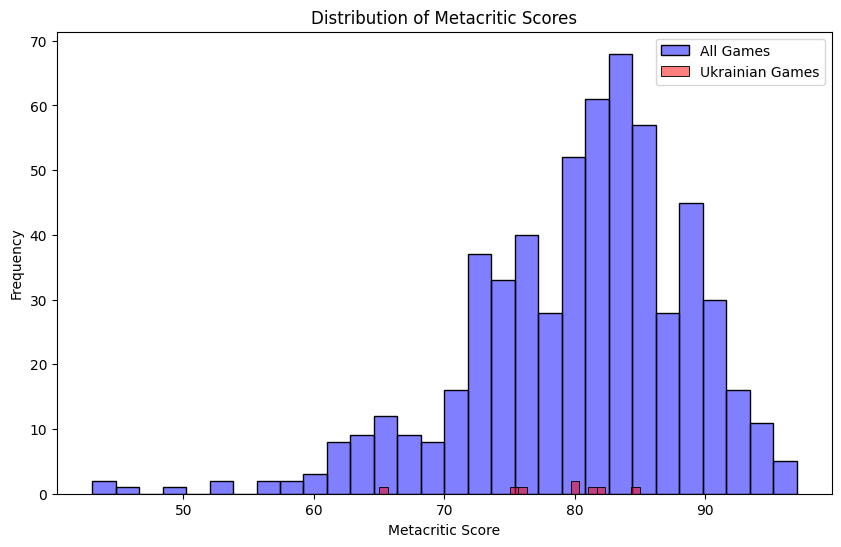

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_app['metacritic'].dropna(), bins=30, color='blue', label='All Games', alpha=0.5)
sns.histplot(ukr_games['metacritic'].dropna(), bins=30, color='red', label='Ukrainian Games', alpha=0.5)
plt.title('Distribution of Metacritic Scores')
plt.xlabel('Metacritic Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

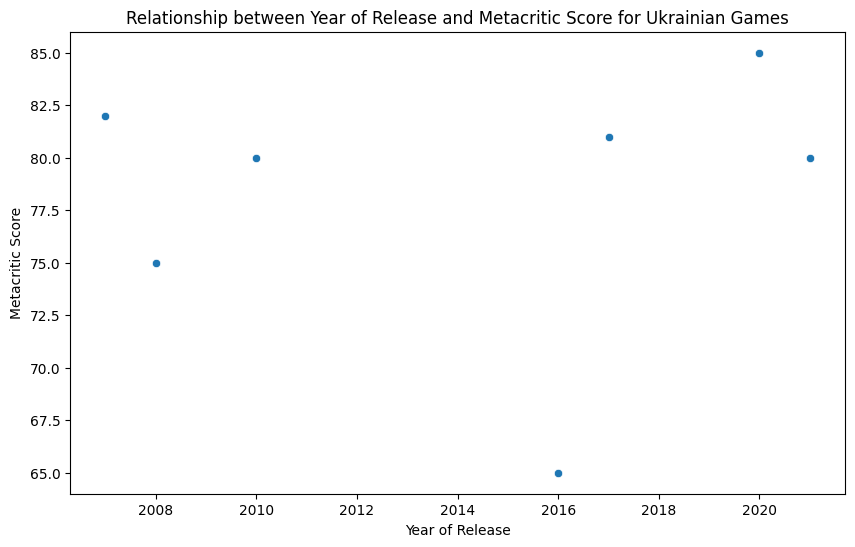

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='metacritic', data=ukr_games)
plt.title('Relationship between Year of Release and Metacritic Score for Ukrainian Games')
plt.xlabel('Year of Release')
plt.ylabel('Metacritic Score')
plt.show()

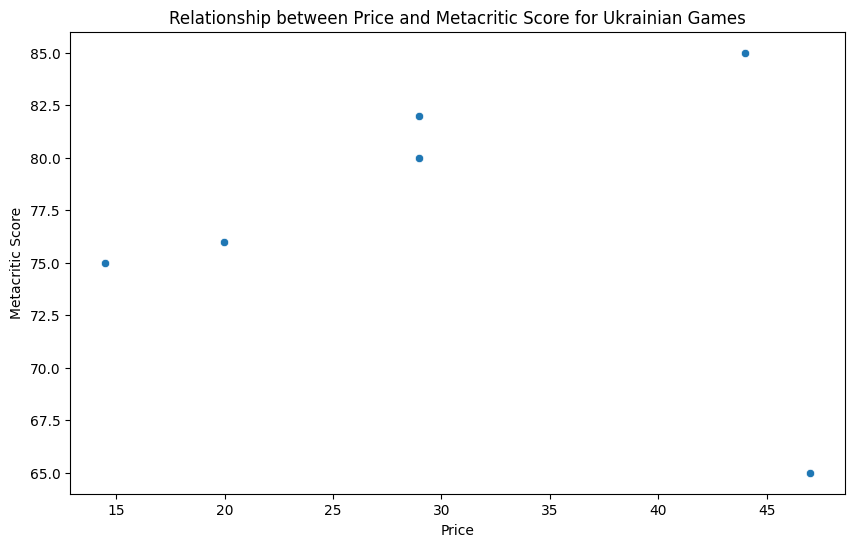

In [ ]:
# Analyze the relationship between price and metacritic scores for Ukrainian games
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='metacritic', data=ukr_games)
plt.title('Relationship between Price and Metacritic Score for Ukrainian Games')
plt.xlabel('Price')
plt.ylabel('Metacritic Score')
plt.show()

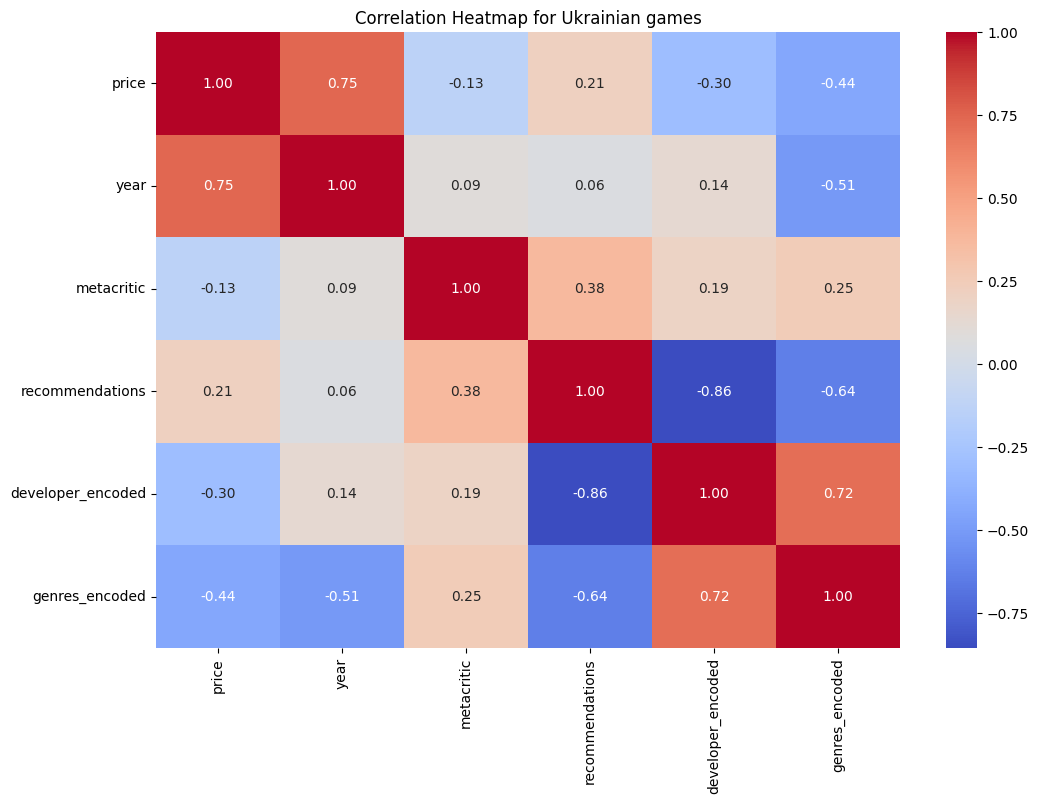

In [ ]:
df_label = ukr_games.copy()

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode 'developer' and 'genres' columns
df_label['developer_encoded'] = label_encoder.fit_transform(df_label['developers'])
df_label['genres_encoded'] = label_encoder.fit_transform(df_label['genres'])

# Select numeric columns
numeric_columns = ['price', 'year', 'metacritic', 'recommendations', 'developer_encoded', 'genres_encoded']

# Calculate correlation matrix
correlation_matrix = df_label[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Ukrainian games')
plt.show()

<ipython-input-44-0f51021a9af0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genres', data=ukr_games, order=ukr_games['genres'].value_counts().index, palette='Set2')


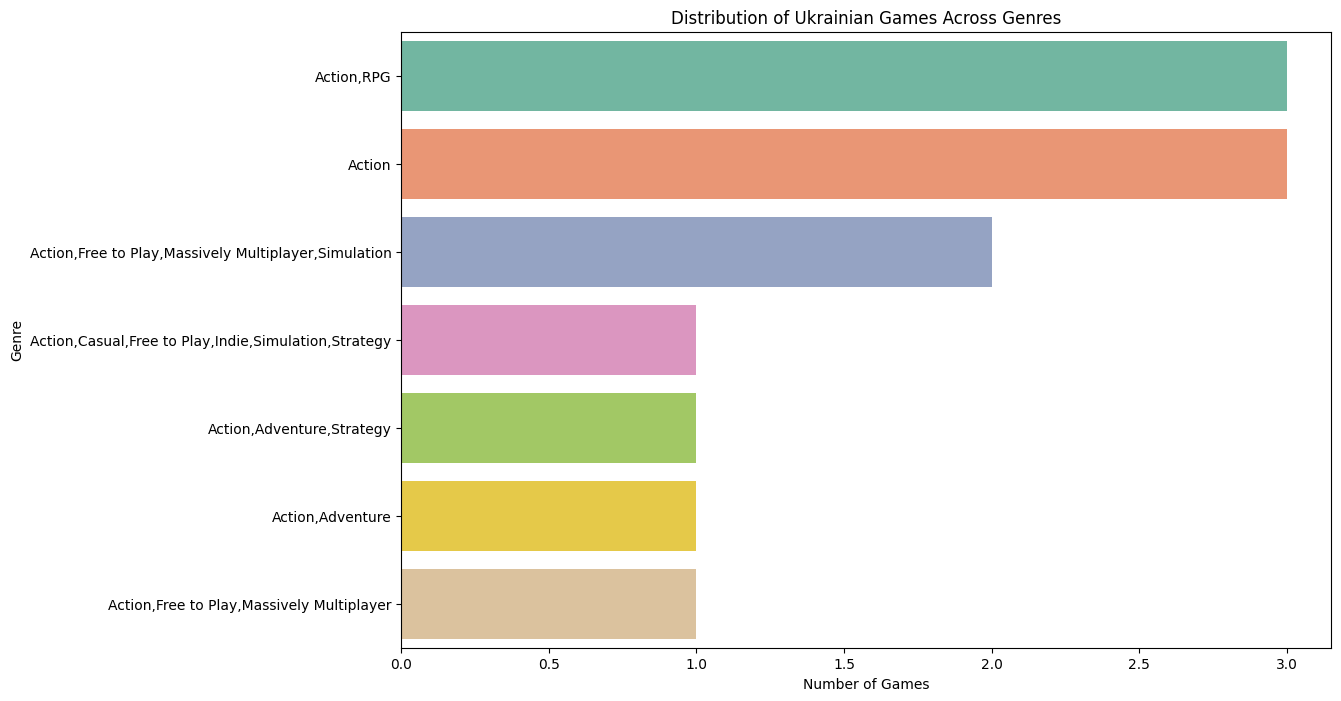

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='genres', data=ukr_games, order=ukr_games['genres'].value_counts().index, palette='Set2')
plt.title('Distribution of Ukrainian Games Across Genres')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

In [ ]:
non_ukr_games = df_app[~df_app['developers'].isin(ukr_developers)]
ukr_lang_in_non_ukr_games = non_ukr_games['Ukr_lang'].value_counts(normalize=True)
print("Proportion of non-Ukrainian games with Ukrainian language support:")
print(ukr_lang_in_non_ukr_games)

Proportion of non-Ukrainian games with Ukrainian language support:
Ukr_lang
No     0.923077
Yes    0.076923
Name: proportion, dtype: float64


In [ ]:
non_ukr_games.describe()

,metacritic,recommendations,price,year
count,578.000000,9.060000e+02,712.000000,939.000000
mean,80.226644,5.785434e+04,113.122879,2015.394036
std,8.439746,1.747566e+05,755.511325,4.387204
min,43.000000,1.030000e+02,0.430000,1997.000000
25%,76.000000,7.260250e+03,14.437500,2013.000000
50%,81.000000,2.063450e+04,24.950000,2016.000000
75%,86.000000,5.258950e+04,39.980000,2019.000000
max,97.000000,3.871754e+06,12900.000000,2023.000000


### Analysis Results




*   Approximately 8% of non-Ukrainian games include Ukrainian language support, whereas 92% of Ukrainian games offer Ukrainian language options (11 out of 12 games)
*   All Ukrainian games feature Action as one of their genres, and most also include Simulator and Strategy genres
*   Among Ukrainian games, 4A Games holds the highest Metacritic score at 80.5
*   Newer Ukrainian games tend to be priced higher compared to older ones
*   The number of recommendations for Ukrainian games varies depending on the developer
*   Ukrainian games nearly match the average Metacritic score, with 78 compared to the overall average of 80



# steamspy_data

In [ ]:
d = files.upload()

Saving steamspy_data.csv to steamspy_data.csv


In [ ]:
spy = pd.read_csv('/content/steamspy_data.csv')

In [ ]:
spy.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,languages,genre,ccu,tags
0,10,Counter-Strike,Valve,Valve,NaN,216345,5530,0,"10,000,000 .. 20,000,000",0,0,0,0,999,999,0,"English, French, German, Italian, Spanish - Sp...",Action,10775,"{'Action': 5448, 'FPS': 4862, 'Multiplayer': 3..."
1,20,Team Fortress Classic,Valve,Valve,NaN,6472,990,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,77,"{'Action': 759, 'FPS': 320, 'Multiplayer': 272..."
2,30,Day of Defeat,Valve,Valve,NaN,5686,634,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Spain",Action,89,"{'FPS': 794, 'World War II': 261, 'Multiplayer..."
3,40,Deathmatch Classic,Valve,Valve,NaN,2242,490,0,"5,000,000 .. 10,000,000",0,0,0,0,499,499,0,"English, French, German, Italian, Spanish - Sp...",Action,8,"{'Action': 633, 'FPS': 147, 'Classic': 113, 'M..."
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,NaN,17468,890,0,"2,000,000 .. 5,000,000",0,0,0,0,499,499,0,"English, French, German, Korean",Action,162,"{'FPS': 905, 'Action': 343, 'Classic': 271, 'S..."


In [ ]:
spy.columns

Index(['appid', 'name', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'userscore', 'owners', 'average_forever', 'average_2weeks',
       'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount',
       'languages', 'genre', 'ccu', 'tags'],
      dtype='object')

In [ ]:
spy.describe()

,appid,score_rank,positive,negative,userscore,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
count,1.000000e+03,0.0,1.000000e+03,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,1000.000000,1000.000000,1000.0000,1.000000e+03
mean,4.756415e+05,NaN,7.109154e+04,10722.915000,0.0,0.0,0.0,0.0,0.0,1487.210000,1781.661000,10.2550,6.262127e+03
std,4.304935e+05,NaN,2.453947e+05,44979.287885,0.0,0.0,0.0,0.0,0.0,1554.987365,1694.741439,25.5569,4.211502e+04
min,1.000000e+01,NaN,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000,0.000000e+00
25%,2.121375e+05,NaN,1.145750e+04,1663.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0000,8.675000e+01
50%,3.325100e+05,NaN,2.600050e+04,3347.000000,0.0,0.0,0.0,0.0,0.0,999.000000,1499.000000,0.0000,4.590000e+02
75%,6.446525e+05,NaN,6.161475e+04,7280.500000,0.0,0.0,0.0,0.0,0.0,1999.000000,2999.000000,0.0000,2.033500e+03
max,2.050650e+06,NaN,6.547618e+06,939005.000000,0.0,0.0,0.0,0.0,0.0,6999.000000,8499.000000,90.0000,1.088407e+06


Remove columns that we do not need anymore:

*   score_rank
*   userscore
*   average_forever
*   average_2weeks
*   median_forever
*   median_2weeks
*   initialprice
*   discount
*   owners
*   publisher
*   languages
*   tags

In [ ]:
spy = spy[['appid', 'name', 'developer','positive',
       'negative','price','genre', 'ccu']]

In [ ]:
spy.head()

,appid,name,developer,positive,negative,price,genre,ccu
0,10,Counter-Strike,Valve,216345,5530,999,Action,10775
1,20,Team Fortress Classic,Valve,6472,990,499,Action,77
2,30,Day of Defeat,Valve,5686,634,499,Action,89
3,40,Deathmatch Classic,Valve,2242,490,499,Action,8
4,50,Half-Life: Opposing Force,Gearbox Software,17468,890,499,Action,162


In [ ]:
# Filter the dataset to include only games developed by Ukrainian developers

ukr_spy = spy[spy['developer'].isin(ukr_developers)]
print("Number of Ukrainian-made games:", len(ukr_spy))

Number of Ukrainian-made games: 13


In [ ]:
print("Summary statistics for Ukrainian games:")
print(ukr_spy.describe())

Summary statistics for Ukrainian games:
              appid       positive      negative        price           ccu
count  1.300000e+01      13.000000     13.000000    13.000000     13.000000
mean   4.110485e+05   45372.923077   7918.461538  1368.538462   2578.769231
std    3.883789e+05   34127.097536   8109.810238  1127.561574   4419.340546
min    4.500000e+03    9721.000000   1195.000000     0.000000     45.000000
25%    2.624100e+05   15138.000000   2495.000000     0.000000    358.000000
50%    3.334200e+05   33889.000000   6061.000000  1999.000000    479.000000
75%    4.442000e+05   66348.000000   9467.000000  1999.000000   1496.000000
max    1.407200e+06  104335.000000  25770.000000  2999.000000  12917.000000


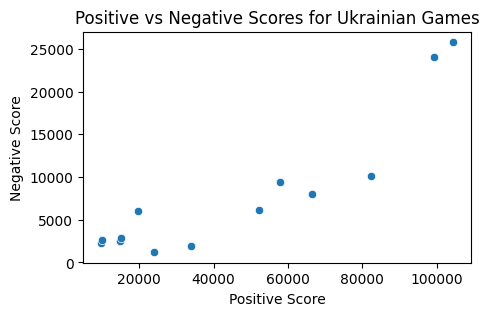

In [ ]:
# Visualization of positive vs negative scores for Ukrainian games
plt.figure(figsize=(5, 3))
sns.scatterplot(data=ukr_spy, x='positive', y='negative')
plt.title('Positive vs Negative Scores for Ukrainian Games')
plt.xlabel('Positive Score')
plt.ylabel('Negative Score')
plt.show()

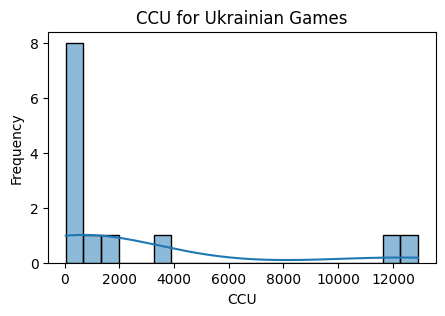

In [ ]:
# Visualization of number of users playing right now for Ukrainian games
plt.figure(figsize=(5, 3))
sns.histplot(data=ukr_spy, x='ccu', bins=20, kde=True)
plt.title('CCU for Ukrainian Games')
plt.xlabel('CCU')
plt.ylabel('Frequency')
plt.show()

In [ ]:
non_ukr_spy = spy[~spy['developer'].isin(ukr_developers)]

In [ ]:
# Calculate average prices
print("Average price for Ukrainan games: ", str(ukr_spy['price'].mean()))
print("Average price for non-Ukrainan games: ", str(non_ukr_spy['price'].mean()))

Average price for Ukrainan games:  1368.5384615384614
Average price for non-Ukrainan games:  1488.77304964539


In [ ]:
avg_positive_ukrainian = ukr_spy['positive'].mean()
avg_negative_ukrainian = ukr_spy['negative'].mean()
avg_positive_non_ukrainian = non_ukr_spy['positive'].mean()
avg_negative_non_ukrainian = non_ukr_spy['negative'].mean()

# Calculate average CCU for Ukrainian and non-Ukrainian games
avg_ccu_ukrainian = ukr_spy['ccu'].mean()
avg_ccu_non_ukrainian = non_ukr_spy['ccu'].mean()

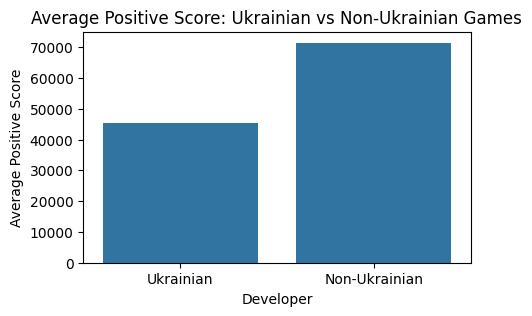

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x=['Ukrainian', 'Non-Ukrainian'], y=[avg_positive_ukrainian, avg_positive_non_ukrainian])
plt.title('Average Positive Score: Ukrainian vs Non-Ukrainian Games')
plt.xlabel('Developer')
plt.ylabel('Average Positive Score')
plt.show()

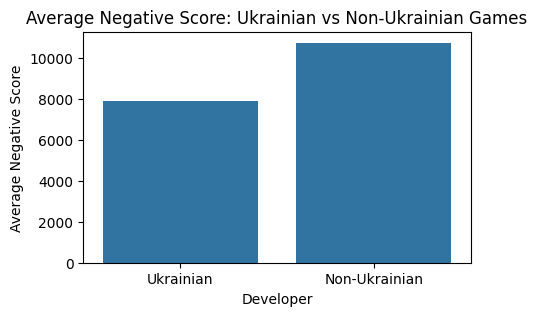

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x=['Ukrainian', 'Non-Ukrainian'], y=[avg_negative_ukrainian, avg_negative_non_ukrainian])
plt.title('Average Negative Score: Ukrainian vs Non-Ukrainian Games')
plt.xlabel('Developer')
plt.ylabel('Average Negative Score')
plt.show()

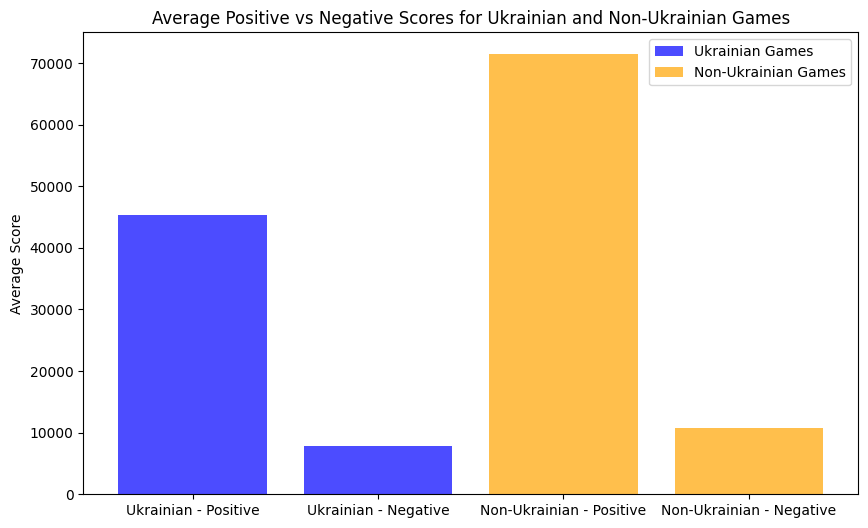

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(['Ukrainian - Positive', 'Ukrainian - Negative'], [avg_positive_ukrainian, avg_negative_ukrainian], color='blue', alpha=0.7, label='Ukrainian Games')

plt.bar(['Non-Ukrainian - Positive', 'Non-Ukrainian - Negative'], [avg_positive_non_ukrainian, avg_negative_non_ukrainian], color='orange', alpha=0.7, label='Non-Ukrainian Games')

plt.title('Average Positive vs Negative Scores for Ukrainian and Non-Ukrainian Games')
plt.ylabel('Average Score')
plt.legend()
plt.show()

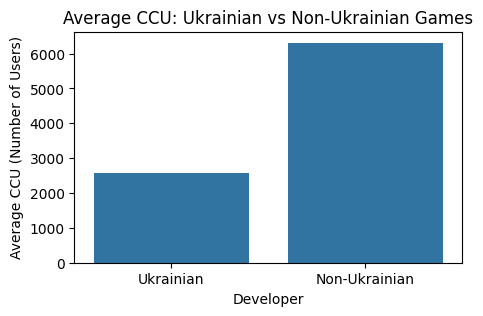

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x=['Ukrainian', 'Non-Ukrainian'], y=[avg_ccu_ukrainian, avg_ccu_non_ukrainian])
plt.title('Average CCU: Ukrainian vs Non-Ukrainian Games')
plt.xlabel('Developer')
plt.ylabel('Average CCU (Number of Users)')
plt.show()

Analysis Results:


*   The Average Positive Score is approximately 50% higher for non-Ukrainian games compared to Ukrainian games. However, the negative score is about 30% lower for Ukrainian games
*   The Average Concurrent Users (CCU) for non-Ukrainian games is over 50% higher than for Ukrainian games
